Imports

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

2022-07-02 21:23:26.974292: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-02 21:23:26.974420: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


DataSet

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()  # split into tetsing and training


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0, 15, 15]

221

In [5]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


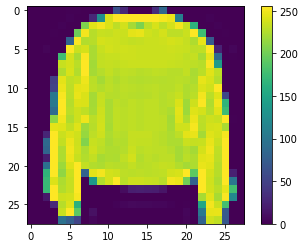

In [7]:
plt.figure()
plt.imshow(train_images[7]) #checking one picture
plt.colorbar()
plt.grid(False)
plt.show()

Data Prepocessing

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0


Building the Model

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


2022-07-02 21:24:06.289140: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-02 21:24:06.289238: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Puli): /proc/driver/nvidia/version does not exist
2022-07-02 21:24:06.290106: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Training Model

In [11]:
# we pass the data, labels and epochs and watch the magic!
model.fit(train_images, train_labels, epochs=20)


Epoch 1/20


2022-07-02 21:24:08.934114: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 13s 6ms/step - loss: 0.5048 - accuracy: 0.8245
Epoch 2/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3790 - accuracy: 0.8640
Epoch 3/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3404 - accuracy: 0.8762
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3168 - accuracy: 0.8828
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2970 - accuracy: 0.8914
Epoch 6/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2818 - accuracy: 0.8963
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2720 - accuracy: 0.8989
Epoch 8/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2587 - accuracy: 0.9039
Epoch 9/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2491 - accuracy: 0.9071
Epoch 10/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2424

Evaluating the Model

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Accuarcy : ', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.3511 - accuracy: 0.8894
Accuarcy :  0.8894000053405762


Predictions

In [13]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [14]:
predictions[0]

array([1.05697694e-10, 7.65845602e-15, 3.98717691e-11, 1.11412984e-12,
       5.49849269e-14, 6.44986227e-04, 1.63317715e-09, 2.77296687e-03,
       6.55934898e-12, 9.96582091e-01], dtype=float32)

In [15]:
print('Predicted : ', np.argmax(predictions[0]))
print('Actual : ', test_labels[0])

Predicted :  9
Actual :  9


Verifying Predictions

1/1 [==============================] - 0s 48ms/step


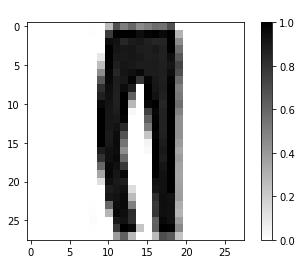

In [18]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected : " + label)
  plt.xlabel("Guess : " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)